In [1]:
%pylab inline
import mnist
import cv2

def recast(x):
    return np.array(x,dtype=np.float32)
train_images = recast(mnist.train_images())
train_labels = mnist.train_labels()
test_images = recast(mnist.test_images())
test_labels = mnist.test_labels()

Populating the interactive namespace from numpy and matplotlib


In [5]:
size=28
def find_shift(image,axis=0):
    x=sum(image,axis=axis)
    nz=np.nonzero(x)[0]
    a=nz[0];b=size-nz[-1]-1
    #print(a,b)
    return (b-a)/2.

def center_image(image):
    s0=find_shift(image,0)  #left-right
    s1=find_shift(image,1)  #up-down
    translation_matrix = np.float32([ [1,0,s0], [0,1,s1] ])
    nimage = cv2.warpAffine(image, translation_matrix, (size,size))
    return nimage


In [7]:
for index in range(10):
    image=train_images[index]
    print(find_shift(image,0),find_shift(image,1), end='  \t')
    nimage=center_image(image)
    print(find_shift(nimage,0),find_shift(nimage,1))

0.0 -1.0  	0.0 0.0
-0.5 0.0  	0.0 0.0
1.0 -1.0  	0.0 0.0
-1.0 -1.0  	0.0 0.0
0.5 -3.0  	0.0 0.0
-1.0 0.0  	0.0 0.0
-1.0 0.0  	0.0 0.0
0.0 -1.0  	0.0 0.0
-0.5 -1.0  	0.0 0.0
-1.0 0.0  	0.0 0.0


In [9]:
centered_train_images=[]
for image in train_images:
    nimage=center_image(image)
    centered_train_images.append(nimage)
    s0=find_shift(nimage,0)
    s1=find_shift(nimage,1)
    if s0 !=0 or s1 != 0:
        print(s0,s1)
        break

In [12]:
centered_test_images=[]
for image in test_images:
    nimage=center_image(image)
    centered_test_images.append(nimage)
    s0=find_shift(nimage,0)
    s1=find_shift(nimage,1)
    if s0 !=0 or s1 != 0:
        print(s0,s1)
        break

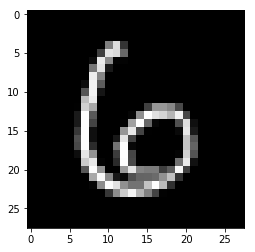

In [13]:
imshow(centered_test_images[100],cmap='gray')

In [16]:
import pickle as pk
with open('centered_data.pkl','wb') as pkfile:
    pk.dump({'train_images':centered_train_images,
             'train_labels':train_labels,
             'test_images':centered_test_images,
             'test_labels':test_labels},pkfile)

In [17]:
!ls -lrt

total 1717576
-rw-r--r--@ 1 yoavfreund  staff    7840016 Apr  5 17:07 t10k-images-idx3-ubyte
-rw-r--r--@ 1 yoavfreund  staff      10008 Apr  5 17:07 t10k-labels-idx1-ubyte
-rw-r--r--@ 1 yoavfreund  staff   47040016 Apr  5 17:07 train-images-idx3-ubyte
-rw-r--r--@ 1 yoavfreund  staff      60008 Apr  5 17:07 train-labels-idx1-ubyte
-rw-r--r--  1 yoavfreund  staff  600579404 Apr  7 10:24 labels.pkl
-rw-r--r--  1 yoavfreund  staff      54964 Apr 23 18:02 computing NN.ipynb
-rw-r--r--  1 yoavfreund  staff      62422 Apr 23 18:07 prep_label_lists.ipynb
-rw-r--r--  1 yoavfreund  staff      11871 Apr 23 20:04 Center bounding box..ipynb
-rw-r--r--  1 yoavfreund  staff  223719807 Apr 23 20:05 centered_data.pkl
